In [1]:
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
import lstm, time #helper libraries

Using TensorFlow backend.


In [47]:
#Step 1 Load Data
time_horizon = 5
# X_train, y_train, X_test, y_test = lstm.load_data('sp500.csv', 5, True)
# X_train, y_train, X_test, y_test = lstm.load_data('btc_open.csv', time_horizon, True) #YES!
# X_train, y_train, X_test, y_test = lstm.load_data('tsla_close.csv', time_horizon, True)
X_train, y_train, X_test, y_test = lstm.load_data('qqq_open.csv', time_horizon, True)

In [48]:
#Step 2 Build Model
model = Sequential()

model.add(LSTM(
    input_dim=1,
    output_dim=100,
    return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(
    100,
    return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(
    output_dim=1))
model.add(Activation('linear'))

start = time.time()
model.compile(loss='mse', optimizer='adam')
print('compilation time : ', time.time() - start)

compilation time :  0.02008509635925293


In [49]:
#Step 3 Train the model
model.fit(
    X_train,
    y_train,
    batch_size=512,
    nb_epoch=100,
    validation_split=0.20)

Train on 2221 samples, validate on 556 samples
Epoch 1/100
2221/2221 [==============================] - 2s 1ms/step - loss: 7.7409e-04 - val_loss: 6.7999e-04
Epoch 2/100
2221/2221 [==============================] - 0s 146us/step - loss: 7.0463e-04 - val_loss: 5.9477e-04
Epoch 3/100
2221/2221 [==============================] - 0s 146us/step - loss: 6.4032e-04 - val_loss: 5.3887e-04
Epoch 4/100
2221/2221 [==============================] - 0s 146us/step - loss: 5.7758e-04 - val_loss: 4.6886e-04
Epoch 5/100
2221/2221 [==============================] - 0s 145us/step - loss: 5.1641e-04 - val_loss: 3.9810e-04
Epoch 6/100
2221/2221 [==============================] - 0s 148us/step - loss: 4.5050e-04 - val_loss: 3.2834e-04
Epoch 7/100
2221/2221 [==============================] - 0s 146us/step - loss: 3.8870e-04 - val_loss: 2.7962e-04
Epoch 8/100
2221/2221 [==============================] - 0s 147us/step - loss: 3.5603e-04 - val_loss: 2.6731e-04
Epoch 9/100
2221/2221 [============================

2221/2221 [==============================] - 0s 155us/step - loss: 1.8482e-04 - val_loss: 1.6224e-04
Epoch 73/100
2221/2221 [==============================] - 0s 159us/step - loss: 1.8421e-04 - val_loss: 1.4515e-04
Epoch 74/100
2221/2221 [==============================] - 0s 153us/step - loss: 1.7715e-04 - val_loss: 1.4954e-04
Epoch 75/100
2221/2221 [==============================] - 0s 159us/step - loss: 1.7671e-04 - val_loss: 1.4360e-04
Epoch 76/100
2221/2221 [==============================] - 0s 145us/step - loss: 1.7986e-04 - val_loss: 1.4436e-04
Epoch 77/100
2221/2221 [==============================] - 0s 158us/step - loss: 1.7831e-04 - val_loss: 1.5628e-04
Epoch 78/100
2221/2221 [==============================] - 0s 157us/step - loss: 1.8359e-04 - val_loss: 1.4970e-04
Epoch 79/100
2221/2221 [==============================] - 0s 154us/step - loss: 1.8967e-04 - val_loss: 1.5429e-04
Epoch 80/100
2221/2221 [==============================] - 0s 155us/step - loss: 1.8081e-04 - val_loss

61.8 61
yo


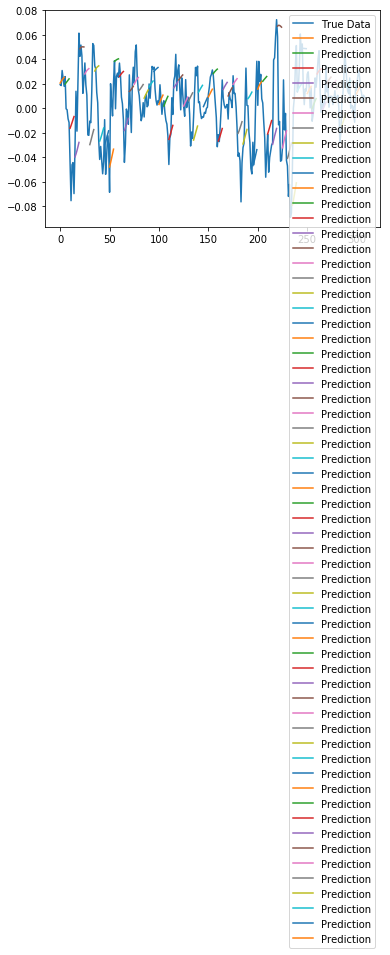

In [50]:
#Step 4 - Plot the predictions!
predictions = lstm.predict_sequences_multiple(model, X_test, time_horizon, time_horizon)
lstm.plot_results_multiple(predictions, y_test, time_horizon)

In [51]:
# model.save('good_model.h5')

# Making Prediction for next timestep

1.0 1
yo


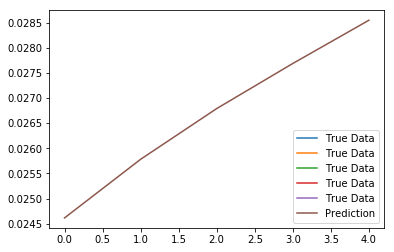

In [52]:
predictions_r = lstm.predict_sequences_multiple(model, X_test[-6:-1], time_horizon, time_horizon)
lstm.plot_results_multiple(predictions_r, predictions_r, time_horizon)